In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
db = pd.read_csv(os.path.join("out", "Salmonella_Chile_201124_filt.tsv"), sep='\t')
db['HC20'] = db['HC20'].astype(str)
db['SISTR1 Serovar HC20'] = db['SISTR1 Serovar'] + " " + db['HC20']
db = db.sort_values(by='SISTR1 Serovar HC20')
db['HC50'] = db['HC50'].astype(str)
db['SISTR1 Serovar HC50'] = db['SISTR1 Serovar'] + " " + db['HC50']
db = db.sort_values(by='SISTR1 Serovar HC50')
db

,Assembly Barcode,SISTR1 Serovar,HC20,HC50,Source Niche,Collection Year,SISTR1 Serovar HC20,SISTR1 Serovar HC50
636,SAL_HD5200AA_AS,Abony,20673,20673,Human,2024,Abony 20673,Abony 20673
280,SAL_TC9745AA_AS,Adelaide,302263,2895,Environment,2019,Adelaide 302263,Adelaide 2895
548,SAL_AD8849AA_AS,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
667,SAL_PD2826AA_AS,Adelaide,465232,2895,Environment,2022,Adelaide 465232,Adelaide 2895
683,SAL_QD5834AA_AS,Agbeni|Kintambo|Washington,279972,279972,Environment,2022,Agbeni|Kintambo|Washington 279972,Agbeni|Kintambo|Washington 279972
...,...,...,...,...,...,...,...,...
732,SAL_PD2956AA_AS,Typhimurium,235790,5196,Environment,2022,Typhimurium 235790,Typhimurium 5196
54,SAL_FB0429AA_AS,Typhimurium,147596,5196,Environment,2013,Typhimurium 147596,Typhimurium 5196
63,SAL_FB0417AA_AS,Typhimurium,75360,5196,Environment,2013,Typhimurium 75360,Typhimurium 5196
231,SAL_MC4097AA_AS,Typhimurium,464,92,Food,2020,Typhimurium 464,Typhimurium 92


In [3]:
SEROTIPOS = ['Typhimurium', 'Newport', 'Enteritidis', 'Infantis', 'I 1,4,[5],12:i:-', 'Agona']
db_solo_serotipos_importancia = db[db['SISTR1 Serovar'].isin(SEROTIPOS)].reset_index(drop=True)
db_solo_serotipos_importancia

,Assembly Barcode,SISTR1 Serovar,HC20,HC50,Source Niche,Collection Year,SISTR1 Serovar HC20,SISTR1 Serovar HC50
0,SAL_FB0432AA_AS,Agona,147593,147593,Environment,2012,Agona 147593,Agona 147593
1,SAL_QD2199AA_AS,Agona,419,29,Environment,2022,Agona 419,Agona 29
2,SAL_JC3732AA_AS,Agona,419,29,Food,2018,Agona 419,Agona 29
3,SAL_KD2093AA_AS,Agona,419,29,Food,2023,Agona 419,Agona 29
4,SAL_ZC7016AA_AS,Agona,419,29,Companion Animal,2021,Agona 419,Agona 29
...,...,...,...,...,...,...,...,...
486,SAL_IC2181AA_AS,Typhimurium,235790,5196,Wild Animal,2015,Typhimurium 235790,Typhimurium 5196
487,SAL_PD2956AA_AS,Typhimurium,235790,5196,Environment,2022,Typhimurium 235790,Typhimurium 5196
488,SAL_FB0429AA_AS,Typhimurium,147596,5196,Environment,2013,Typhimurium 147596,Typhimurium 5196
489,SAL_FB0417AA_AS,Typhimurium,75360,5196,Environment,2013,Typhimurium 75360,Typhimurium 5196


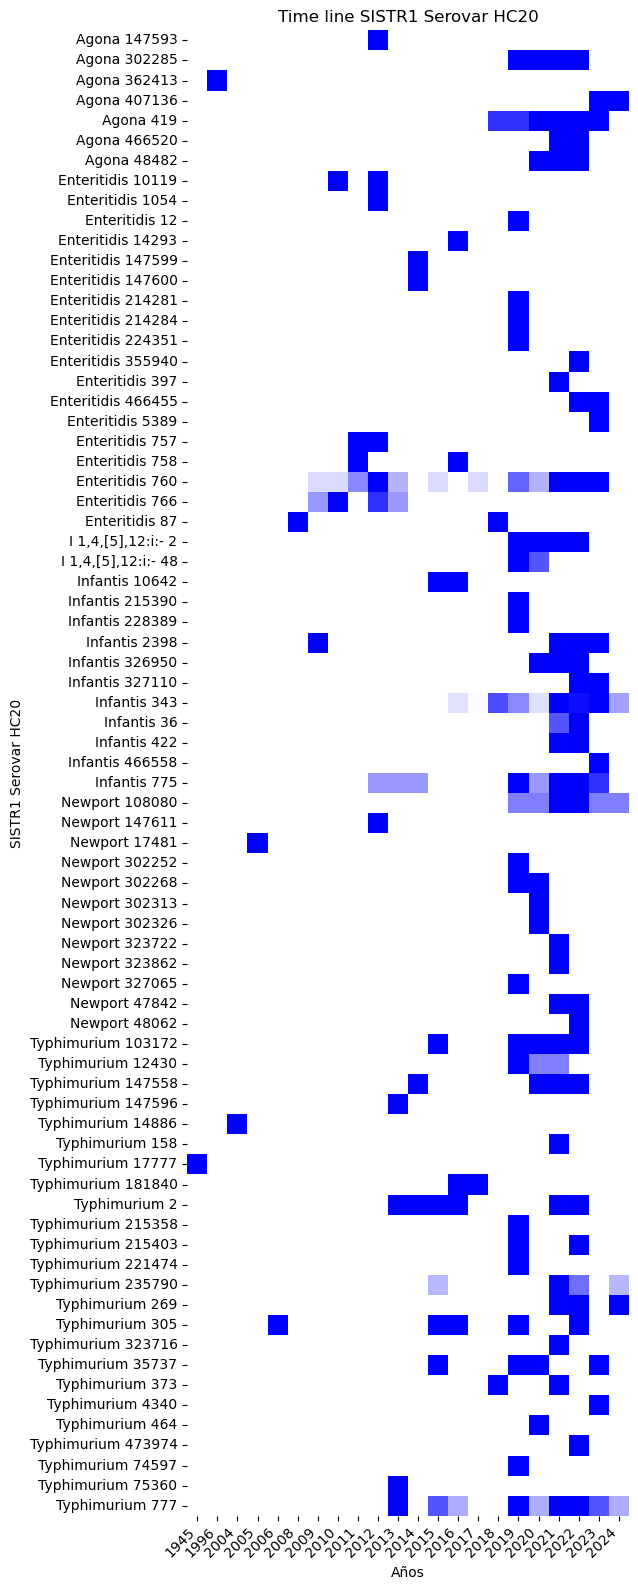

In [4]:
"""
Mapa de calor, porcentaje AMR en cluster HC
"""
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 1, 1), (0, 0, 1), (0, 0, 1)]  
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=100)

HC = 'HC20'
matrix = db_solo_serotipos_importancia.groupby([f'SISTR1 Serovar {HC}', 'Collection Year']).size().unstack(fill_value=0)
heat_map = matrix.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(18, 16))
ax = sns.heatmap(heat_map, cmap=custom_cmap, cbar=False, linecolor='#d5fcd4', square=True, annot=False)

plt.xticks(rotation=45, ha='right')
plt.title(f'Time line SISTR1 Serovar {HC}')
plt.xlabel('Años')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.show()

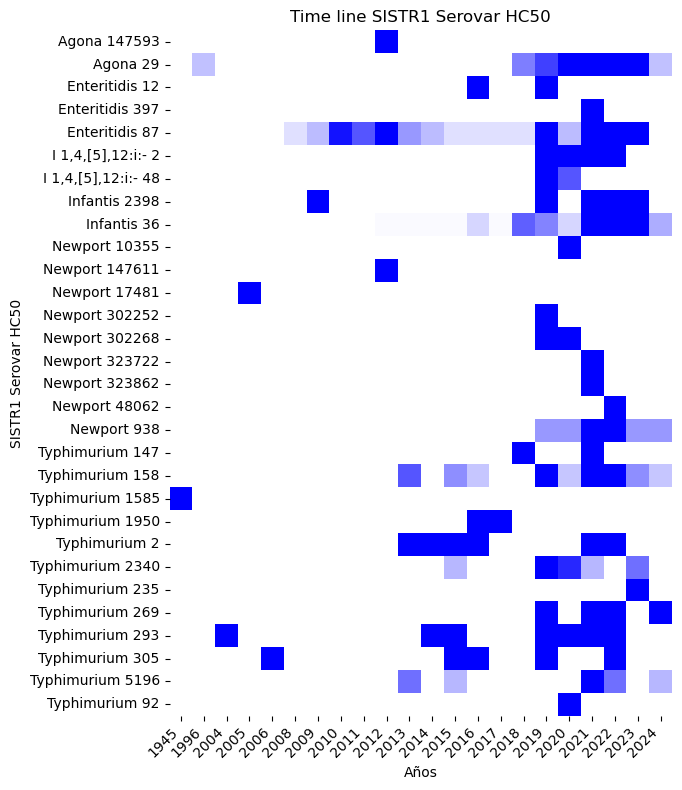

In [5]:
"""
Mapa de calor, porcentaje AMR en cluster HC
"""
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 1, 1), (0, 0, 1), (0, 0, 1)]  
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=100)

HC = 'HC50'
matrix = db_solo_serotipos_importancia.groupby([f'SISTR1 Serovar {HC}', 'Collection Year']).size().unstack(fill_value=0)
heat_map = matrix.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map, cmap=custom_cmap, cbar=False, linecolor='#d5fcd4', square=True, annot=False)

plt.xticks(rotation=45, ha='right')
plt.title(f'Time line SISTR1 Serovar {HC}')
plt.xlabel('Años')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.show()

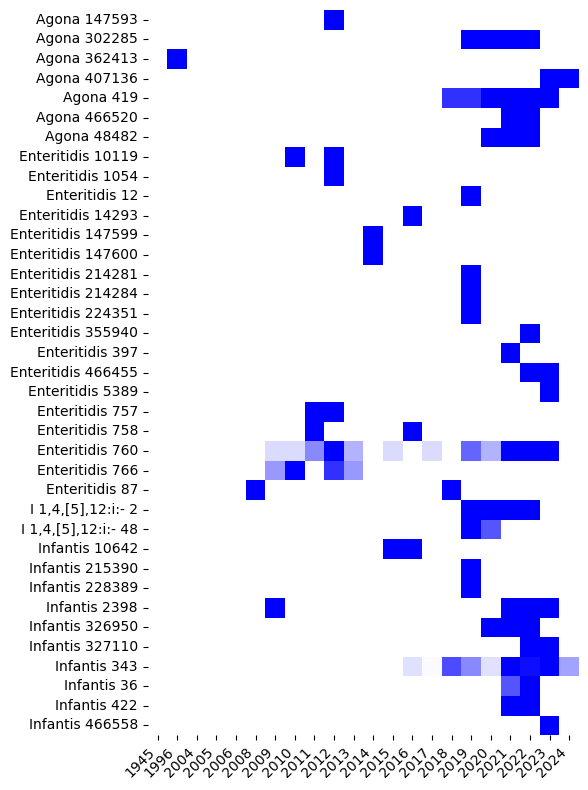

In [18]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# Definición del colormap personalizado
colors = [(1, 1, 1), (0, 0, 1), (0, 0, 1)]  
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=100)

# División de la matriz: seleccionamos la primera mitad de las filas
HC = 'HC20'
matrix = db_solo_serotipos_importancia.groupby([f'SISTR1 Serovar {HC}', 'Collection Year']).size().unstack(fill_value=0)
heat_map = matrix.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

# Selección de la primera mitad de la matriz
half_rows = heat_map.shape[0] // 2
heat_map_half = heat_map.iloc[:half_rows, :]

# Gráfico del heatmap con la mitad de la matriz
plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map_half, cmap=custom_cmap, cbar=False, linecolor='#d5fcd4', square=True, annot=False)

# Ajustes de etiquetas y título
plt.xticks(rotation=45, ha='right')
plt.title(f'')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.savefig(f'timeline{HC}_pt1.png', format='png', dpi=900, bbox_inches='tight')
plt.show()


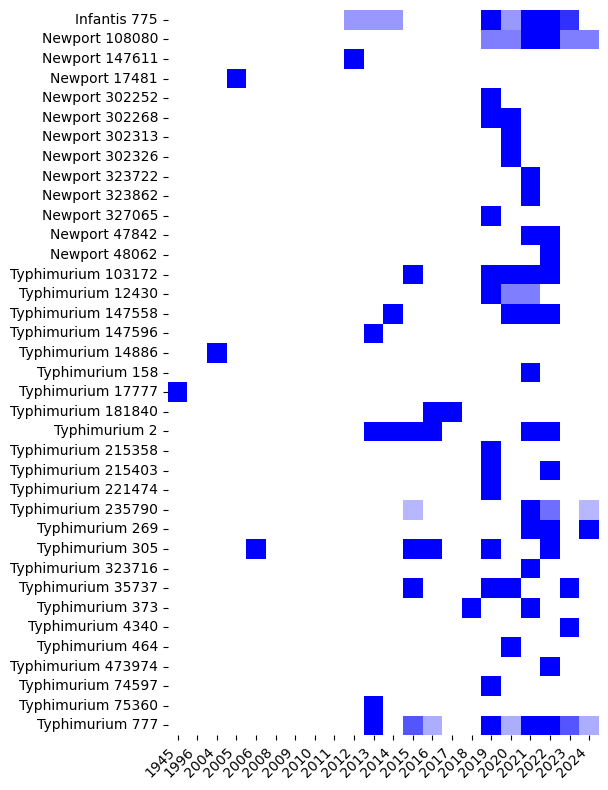

In [17]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# Definición del colormap personalizado
colors = [(1, 1, 1), (0, 0, 1), (0, 0, 1)]  
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=100)

# Cálculo de la matriz y normalización
HC = 'HC20'
matrix = db_solo_serotipos_importancia.groupby([f'SISTR1 Serovar {HC}', 'Collection Year']).size().unstack(fill_value=0)
heat_map = matrix.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

# Selección de la segunda mitad de la matriz
half_rows = heat_map.shape[0] // 2
heat_map_second_half = heat_map.iloc[half_rows:, :]

# Gráfico del heatmap con la segunda mitad de la matriz
plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map_second_half, cmap=custom_cmap, cbar=False, linecolor='#d5fcd4', square=True, annot=False)

# Ajustes de etiquetas y título
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.savefig(f'timeline{HC}_pt2.png', format='png', dpi=900, bbox_inches='tight')
plt.show()


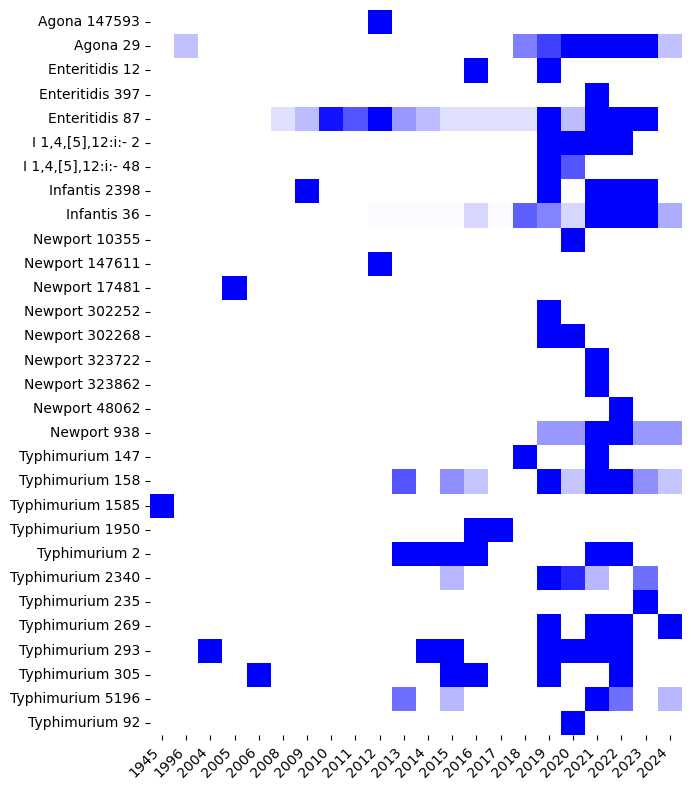

In [21]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# Definición del colormap personalizado
colors = [(1, 1, 1), (0, 0, 1), (0, 0, 1)]  
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=100)

# División de la matriz: seleccionamos la primera mitad de las filas
HC = 'HC50'
matrix = db_solo_serotipos_importancia.groupby([f'SISTR1 Serovar {HC}', 'Collection Year']).size().unstack(fill_value=0)
heat_map = matrix.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

# Selección de la primera mitad de la matriz
#half_rows = heat_map.shape[0] // 2
#heat_map_half = heat_map.iloc[:half_rows, :]

# Gráfico del heatmap con la mitad de la matriz
plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map, cmap=custom_cmap, cbar=False, linecolor='#d5fcd4', square=True, annot=False)

# Ajustes de etiquetas y título
plt.xticks(rotation=45, ha='right')
plt.title(f'')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.savefig(f'timeline{HC}_pt1.png', format='png', dpi=900, bbox_inches='tight')
plt.show()


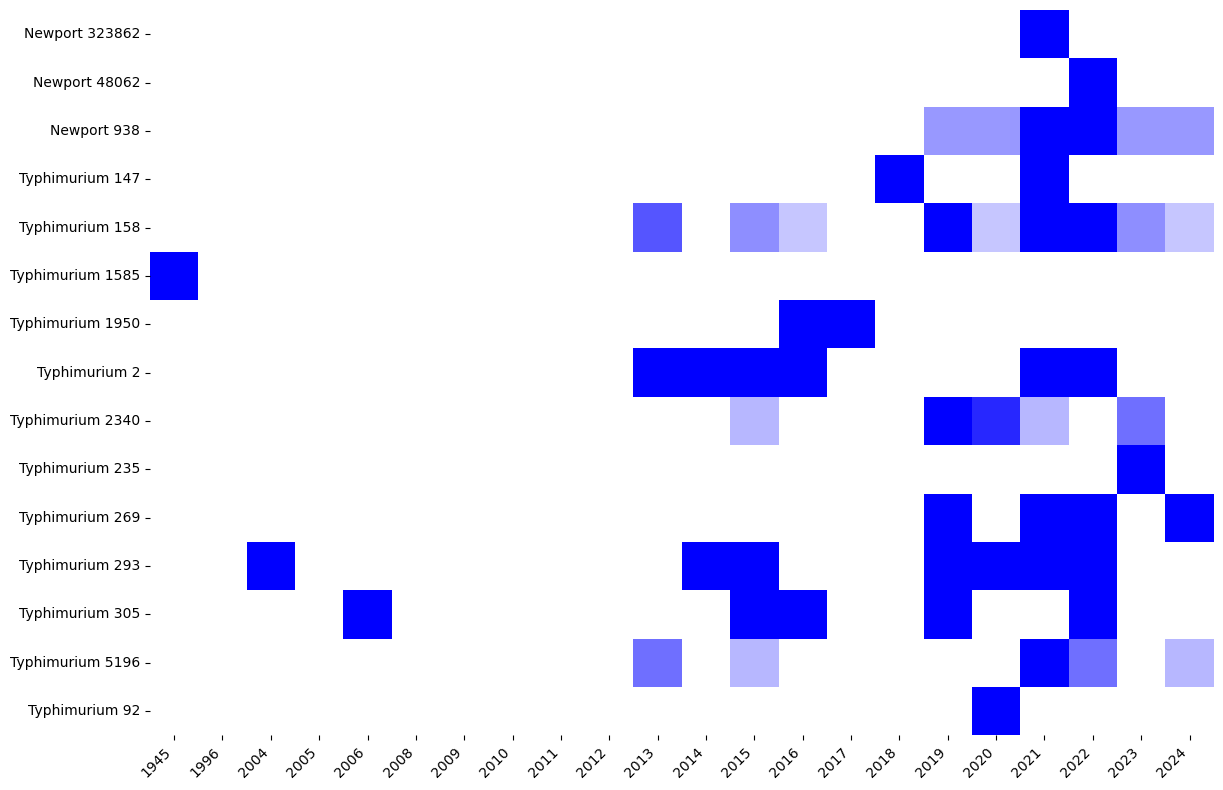

In [20]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# Definición del colormap personalizado
colors = [(1, 1, 1), (0, 0, 1), (0, 0, 1)]  
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=100)

# Cálculo de la matriz y normalización
HC = 'HC50'
matrix = db_solo_serotipos_importancia.groupby([f'SISTR1 Serovar {HC}', 'Collection Year']).size().unstack(fill_value=0)
heat_map = matrix.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

# Selección de la segunda mitad de la matriz
half_rows = heat_map.shape[0] // 2
heat_map_second_half = heat_map.iloc[half_rows:, :]

# Gráfico del heatmap con la segunda mitad de la matriz
plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map_second_half, cmap=custom_cmap, cbar=False, linecolor='#d5fcd4', square=True, annot=False)

# Ajustes de etiquetas y título
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.savefig(f'timeline{HC}_pt2.png', format='png', dpi=900, bbox_inches='tight')
plt.show()